<a href="https://colab.research.google.com/github/elsafauroux/Satisfaction/blob/main/PROJET_Satisfaction_EFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.color_palette("viridis", as_cmap=True)

df = pd.read_csv('reviews_trust.csv',sep=',')
df.head()



,Commentaire,star,date,client,reponse,source,company,ville,maj,date_commande,ecart
0,"Bonjour , Ca doit faire 5 ans environ que je s...",1,2021-06-20 00:00:00+00:00,AUDREY Du 62,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
1,Vente lacoste article manquant photo prise sur...,1,2021-06-20 00:00:00+00:00,Nanasky De Verteuil,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
2,"Vente Lacoste Honteuse , article erroné , arti...",1,2021-06-19 00:00:00+00:00,Vanessa L,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
3,J'ai commandé des mules de la marque Moosefiel...,2,2021-06-19 00:00:00+00:00,Valery PERRAULT,"Bonjour , Je suis sincèrement navré d'apprendr...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
4,Commande téléphone etat A+ . Livraison d un vi...,1,2021-06-19 00:00:00+00:00,JULIE DRINGENBERG,"Bonjour Julie , Je suis sincèrement désolé de ...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN


# Type et valeurs manquantes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19863 entries, 0 to 19862
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Commentaire    19834 non-null  object 
 1   star           19863 non-null  int64  
 2   date           19488 non-null  object 
 3   client         10215 non-null  object 
 4   reponse        8477 non-null   object 
 5   source         19863 non-null  object 
 6   company        19863 non-null  object 
 7   ville          4860 non-null   object 
 8   maj            5 non-null      object 
 9   date_commande  6686 non-null   object 
 10  ecart          6686 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 1.7+ MB


# Statistiques descriptives univarié




In [ ]:
df.describe()

,star,ecart
count,19863.000000,6686.000000
mean,3.408398,14.286419
std,1.650531,10.373320
min,1.000000,1.000000
25%,1.000000,9.000000
50%,4.000000,12.000000
75%,5.000000,17.000000
max,5.000000,304.000000


5    0.401752
1    0.257866
4    0.186528
3    0.087952
2    0.065901
Name: star, dtype: float64

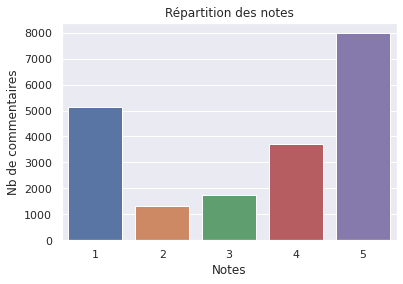

In [48]:
sns.countplot(x=df['star'])
plt.title('Répartition des notes')
plt.xlabel('Notes')
plt.ylabel('Nb de commentaires');

df['star'].value_counts(normalize=1)

TrustedShop    0.730152
TrustPilot     0.269848
Name: source, dtype: float64

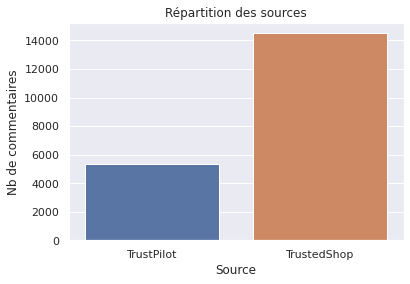

In [ ]:
sns.countplot(x=df['source'])
plt.title('Répartition des sources')
plt.xlabel('Source')
plt.ylabel('Nb de commentaires');

df['source'].value_counts(normalize=1)

ShowRoom    0.846952
VeePee      0.153048
Name: company, dtype: float64

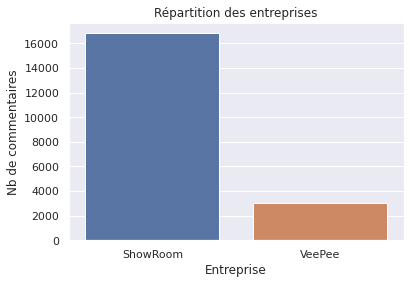

In [ ]:
sns.countplot(x=df['company'])
plt.title('Répartition des entreprises')
plt.xlabel('Entreprise')
plt.ylabel('Nb de commentaires');

df['company'].value_counts(normalize=1)

2015       67
2016      232
2017      362
2018      497
2019     1173
2020    13731
2021     3426
nan       375
Name: annee, dtype: int64

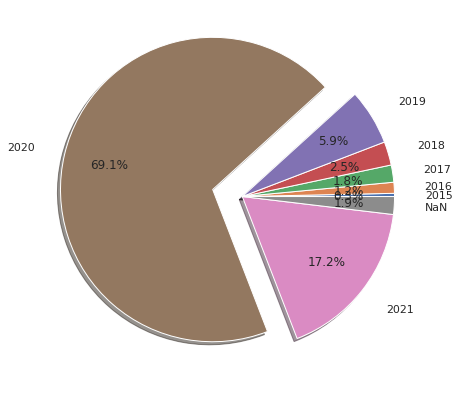

In [76]:
df['date'] = (df['date'].apply(str))
df['annee']=df.date.apply(lambda x : x[:4]) 

tableau = df_sorted['annee'].value_counts(sort=False)


plt.figure(figsize = (7, 7))

plt.pie(x = tableau, labels = ['2015', '2016', '2017','2018', '2019', '2020','2021','NaN'],
           explode = [0, 0, 0, 0, 0, 0.2,0,0],
           autopct = lambda x: str(round(x, 1)) + '%',
           pctdistance = 0.7, labeldistance = 1.2,
           shadow = True);


tableau





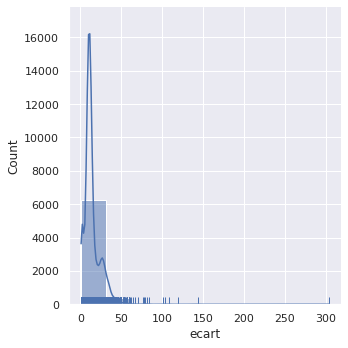

In [46]:
df['ecart'].value_counts(normalize=1)
sns.displot(df['ecart'], bins = 10, kind = 'hist', rug=1, kde=1);

In [ ]:
df['maj'].value_counts()

2021-04-30    1
2021-04-24    1
2021-04-15    1
2021-02-26    1
2021-02-23    1
Name: maj, dtype: int64

il faut remplacer maj dans date commentaire?

In [ ]:
df['ville'].value_counts()

Paris                 110
Lyon                   44
Marseille              38
BRIVE LA GAILLARDE     32
Strasbourg             32
                     ... 
Saint-gilles            1
VITRY SUR SEINE         1
Solesmes                1
Capestang               1
Yzeure                  1
Name: ville, Length: 2457, dtype: int64

variable a supprimer car peu d'occurences ou on peut aussi chercher une base ville / pays pour apporter la dimansion pays

# **Analyse mutlivariée **

In [ ]:
pd.crosstab(df['company'], df['source'])

source,TrustPilot,TrustedShop
company,,
ShowRoom,2320,14503
VeePee,3040,0


In [174]:
pd.crosstab(df['company'], df['annee'])

annee,2015,2016,2017,2018,2019,2020,2021,nan
company,,,,,,,,
ShowRoom,0,0,0,0,419,12903,3126,375
VeePee,67,232,362,497,754,828,300,0


In [170]:
pd.crosstab(df['company'], df['annee'])

annee,2015,2016,2017,2018,2019,2020,2021,nan
company,,,,,,,,
ShowRoom,0,0,0,0,419,12903,3126,375
VeePee,67,232,362,497,754,828,300,0


star,1,2,3,4,5
company,,,,,
ShowRoom,0.159246,0.064495,0.099507,0.213696,0.463057
VeePee,0.803618,0.073684,0.024013,0.036184,0.062500


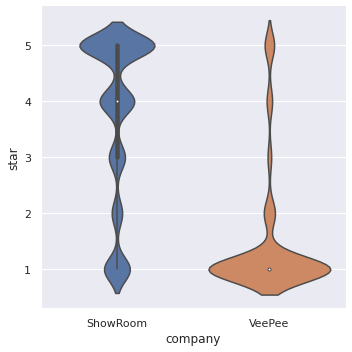

In [169]:
sns.catplot(x='company', y='star', kind='violin', data=df);

pd.crosstab(df['company'], df['star'],normalize=0)


star,1,2,3,4,5
source,,,,,
TrustPilot,0.827799,0.069776,0.020522,0.029851,0.052052
TrustedShop,0.047232,0.064469,0.112873,0.244432,0.530994


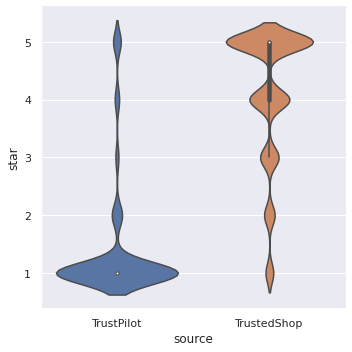

In [168]:
sns.catplot(x='source', y='star', kind='violin', data=df);

pd.crosstab(df['source'], df['star'],normalize=0)

In [ ]:
pd.crosstab(df['source'], df['star'],normalize=0)


star,1,2,3,4,5
source,,,,,
TrustPilot,0.827799,0.069776,0.020522,0.029851,0.052052
TrustedShop,0.047232,0.064469,0.112873,0.244432,0.530994


(0.0, 150.0)

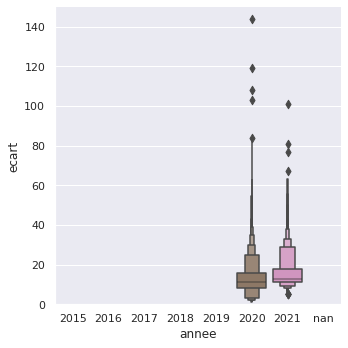

In [27]:
df_sorted = df.sort_values(by = 'annee', ascending = True)
sns.catplot(x='annee', y='ecart', kind='boxen', data=df_sorted);

#valeur abberante avec un ecart a plus de 300 en 2021 donc zoom 
plt.ylim(0,150)


star,1,2,3,4,5
ecart_q,,,,,
ecart_q1,0.032091,0.049172,0.079193,0.238613,0.600932
ecart_q2,0.026164,0.045003,0.093145,0.254317,0.581371
ecart_q3,0.042453,0.047170,0.108491,0.229560,0.572327
ecart_q4,0.055379,0.060471,0.139402,0.259707,0.485041


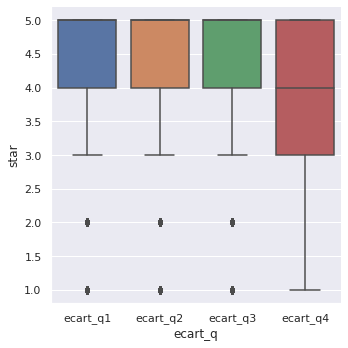

star,1,2,3,4,5
company,,,,,
ShowRoom,0.206334,0.054702,0.085413,0.200256,0.453295
VeePee,0.880000,0.070000,0.010000,0.006667,0.033333


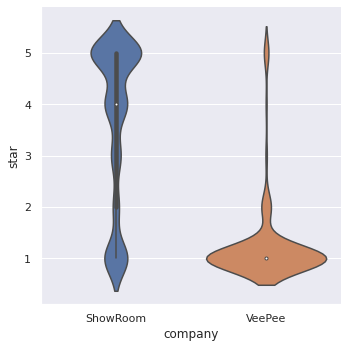

In [31]:
df_recent = df.loc[df['annee']=='2021']
sns.catplot(x='company', y='star', kind='violin', data=df_recent);

pd.crosstab(df_recent['company'], df_recent['star'],normalize=0)

star,1,2,3,4,5
annee,,,,,
2015,47,9,7,2,2
2016,153,38,10,18,13
2017,313,26,6,6,11
2018,424,34,13,6,20
2019,872,71,23,71,136
2020,2383,911,1376,2874,6187
2021,909,192,270,628,1427
nan,21,28,42,100,184


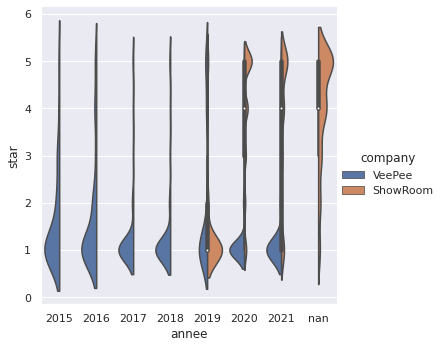

In [82]:
sns.catplot(x='annee', y='star', kind='violin', hue='company',split=True,data=df_sorted);

pd.crosstab(df['annee'], df['star'],normalize=0)
pd.crosstab(df['annee'], df['star'])

In [98]:
df['reponse'].astype('str')
df['reponse'] = df['reponse'].fillna(0) 
df['reponse_boolean']=df.reponse.apply(lambda x: False if x == 0 else True)

df['reponse_boolean'].value_counts(normalize=1)

#sns.catplot(x='reponse_boolean', y='star', kind='bar', data=df_recent);
#ne fonctionne pas 

pd.crosstab(df['reponse_boolean'], df['star'],normalize=0)


star,1,2,3,4,5
reponse_boolean,,,,,
False,0.334358,0.092131,0.118391,0.237485,0.217636
True,0.155126,0.030671,0.047069,0.118084,0.649050


In [176]:
pd.crosstab(df['reponse_boolean'], df['company'])

company,ShowRoom,VeePee
reponse_boolean,,
False,8346,3040
True,8477,0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:156: UserWarning: The handle <matplotlib.patches.Patch object at 0x7f575d99aed0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


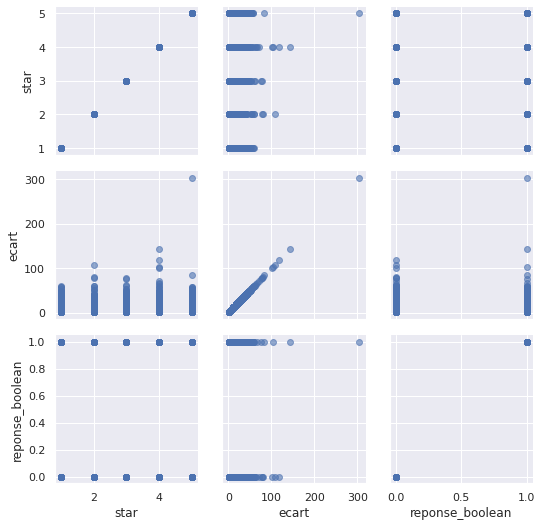

In [37]:

g = sns.PairGrid(df)
g.map(plt.scatter, alpha=0.6)
g.add_legend()



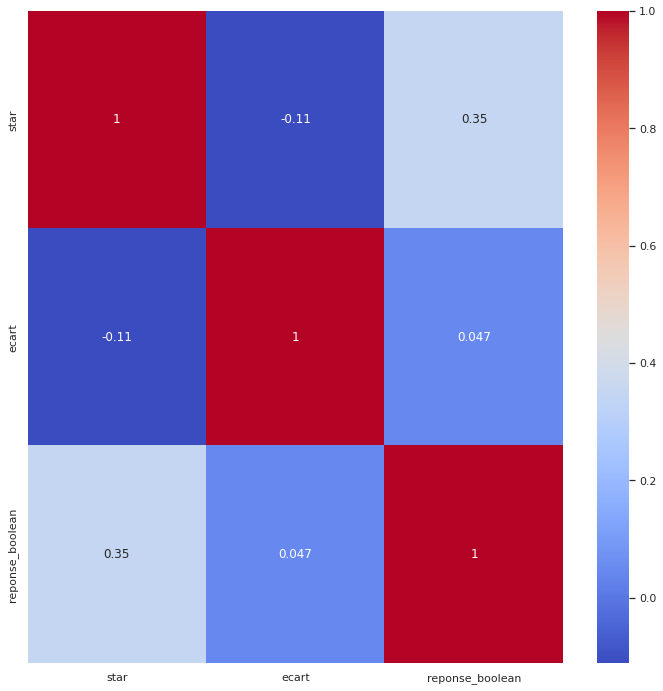

In [42]:
cor = df.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm');

star,1,2,3,4,5
ecart_q,,,,,
ecart_q1,0.032091,0.049172,0.079193,0.238613,0.600932
ecart_q2,0.026164,0.045003,0.093145,0.254317,0.581371
ecart_q3,0.042453,0.047170,0.108491,0.229560,0.572327
ecart_q4,0.055379,0.060471,0.139402,0.259707,0.485041


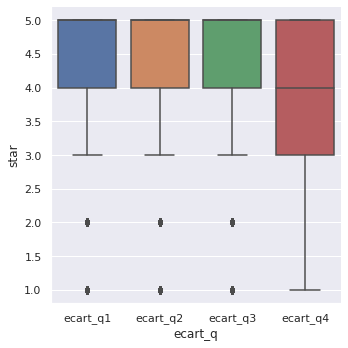

In [43]:
df['ecart_q'] = pd.qcut(df['ecart'], 4, labels=['ecart_q1', 'ecart_q2', 'ecart_q3', 'ecart_q4'])

sns.catplot(x='ecart_q', y='star', kind='box', data=df)

pd.crosstab(df['ecart_q'], df['star'],normalize=0)


# **Text mining  - WordCloud **

In [102]:
# mettre dans une variable tous les commentaires de la df
text = ""
for comment in df.Commentaire : 
    text += str(comment)

# implementer les stopword
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('french'))
print(stop_words)

{'fûtes', 'étais', 'ses', 'serait', 'leur', 'seras', 'eussions', 'soyons', 'avons', 'ayantes', 'aie', 'et', 'soyez', 'd', 'as', 'ont', 'tu', 'avec', 'auras', 'sera', 'aurais', 'étant', 'ton', 'furent', 'sa', 'c', 'du', 'ma', 't', 'eûmes', 'eussiez', 'seraient', 'je', 'soient', 'j', 'à', 'eu', 'était', 'auriez', 'la', 'ne', 'été', 'eûtes', 'étées', 'au', 'nos', 'eussent', 'il', 'm', 'fus', 'aurez', 'ayons', 'fussions', 'étaient', 'me', 'un', 'aient', 'eurent', 'qui', 'ayants', 'avaient', 'étée', 'eut', 'pour', 'avez', 'ayez', 'étantes', 'soit', 'fûmes', 'vos', 'fussiez', 'ces', 'eus', 'des', 'auront', 'aviez', 'aies', 'aurions', 'serais', 'eux', 'suis', 'aux', 'même', 'l', 'en', 'eût', 'êtes', 'y', 'est', 'ait', 'n', 'étante', 'aurait', 'te', 'ta', 'par', 'tes', 'auraient', 'fusse', 'serons', 'seront', 'dans', 'mes', 'étés', 'vous', 'sommes', 'ayante', 'eusse', 'sois', 'ce', 'ils', 'les', 'pas', 'notre', 'toi', 'aurai', 'seriez', 'eues', 'de', 'serai', 'serez', 'mais', 'le', 'lui', 'aur

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


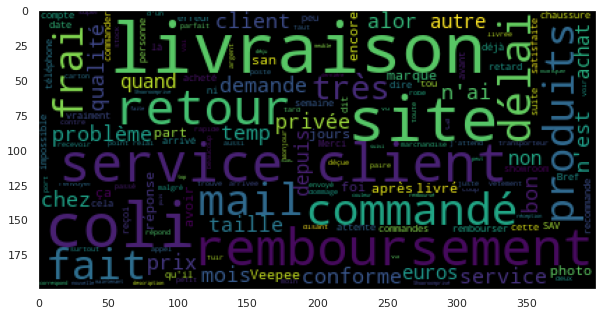

In [120]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

stop_words.update(["plus", "commande","article","articles","toujours","jamais","si","produit","vente","a","bien",'rien','jour',"j'ai","reçu","tout"])

wc = WordCloud(background_color="black", max_words=150, stopwords=stop_words, max_font_size=50, random_state=42)

plt.figure(figsize= (10,10)) # Initialisation d'une figure
plt.grid(visible = False)
wc.generate(text)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()



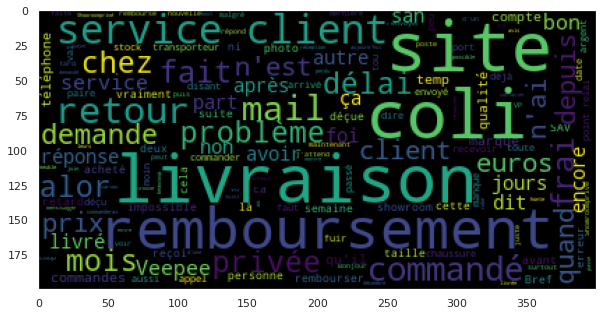

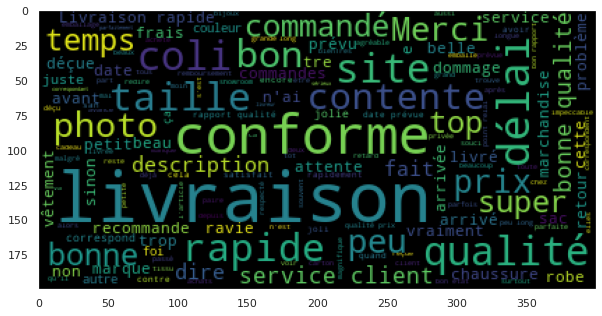

In [123]:
df_positif = df.loc[df['star']>=4]
df_negatif = df.loc[df['star']<4]


# mettre dans une variable tous les commentaires de la df
text_neg = ""
for comment in df_negatif.Commentaire : 
    text_neg += str(comment)


# mettre dans une variable tous les commentaires de la df
text_pos = ""
for comment in df_positif.Commentaire : 
    text_pos += str(comment)

stop_words.update(["plus", "commande","article","articles","toujours","jamais","si","produit","vente","a","bien",'rien','jour',"j'ai","reçu","tout","satisfaite","produits","parfait","très","achat"])

wc = WordCloud(background_color="black", max_words=150, stopwords=stop_words, max_font_size=50, random_state=42)


plt.figure(figsize= (10,10)) # Initialisation d'une figure
plt.grid(visible = False)
wc.generate(text_neg)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()


plt.figure(figsize= (10,10)) # Initialisation d'une figure
plt.grid(visible = False)
wc.generate(text_pos)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()


In [163]:
df['text_min']=df['Commentaire'].str.lower()

df['Colis'] = df['text_min'].str.contains("colis")
df['Livraison'] = df['text_min'].str.contains("livraison")
df['Service Client'] = df['text_min'].str.contains("service client")
df['Site_web'] = df['text_min'].str.contains("site")
df['Taille'] = df['text_min'].str.contains("taille")
df['Qualité'] = df['text_min'].str.contains("qualité")

# Correlation ok sauf site web


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


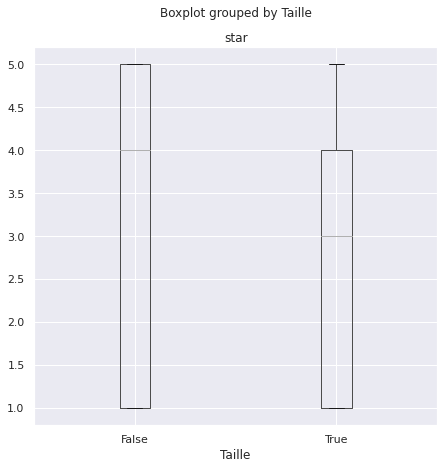

In [165]:
df.boxplot(column= 'star', by='Taille', figsize= (7,7));

In [151]:
import statsmodels.api 

result = statsmodels.formula.api.ols('star ~ Colis', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

#la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse selon laquelle la taille n'influe pas sur la note.
#OK

,df,sum_sq,mean_sq,F,PR(>F)
Taille,1.0,108.150037,108.150037,39.790582,2.886826e-10
Residual,19832.0,53902.994109,2.717981,NaN,NaN


In [152]:
import statsmodels.api 

result = statsmodels.formula.api.ols('star ~ Livraison', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Livraison,1.0,400.248999,400.248999,148.062033,6.075815e-34
Residual,19832.0,53610.895147,2.703252,NaN,NaN


In [166]:
import statsmodels.api 

result = statsmodels.formula.api.ols('star ~ Site_web', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Site_web,1.0,7659.473064,7659.473064,3277.177851,0.0
Residual,19832.0,46351.671082,2.337216,NaN,NaN


In [157]:
import statsmodels.api 

result = statsmodels.formula.api.ols('star ~ Taille', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Taille,1.0,108.150037,108.150037,39.790582,2.886826e-10
Residual,19832.0,53902.994109,2.717981,NaN,NaN


In [158]:
import statsmodels.api 

result = statsmodels.formula.api.ols('star ~ Qualité', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Qualité,1.0,26.927566,26.927566,9.892289,0.001662
Residual,19832.0,53984.216581,2.722076,NaN,NaN
